In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# vizualizing
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import matplotlib.style as style
import pandas_profiling
pd.set_option("display.precision", 2)
sns.set(style="whitegrid", color_codes=True)

In [6]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import logging
from pathlib import Path

In [7]:
_format = '%(message)s'
logging.basicConfig(level=logging.INFO, format=_format)
logger = logging.getLogger(__name__)

### - Loading data via pandas
### - Printing datasets size and first rows from the dataset
### - Printing number of rows with missing values

In [8]:
data_path = Path('data')
data = 'all-2.csv'
stat_html = 'stat.html'

In [9]:
df = pd.read_csv(data_path.joinpath(data), sep=';', 
                    parse_dates=['datereport'], low_memory=False, 
                    na_values=['nan', '?'], infer_datetime_format=True, index_col='datereport')
df.head()

AES     TEC    VDE     TES     GES  GAES_GEN  \
datereport                                                              
2021-04-28 07:00:00  10303.0  1126.0  630.0  3379.0  1902.0       0.0   
2021-04-28 06:00:00  10304.0   963.0  396.0  3068.0  1098.0       0.0   
2021-04-28 05:00:00  10263.0   938.0  386.0  3029.0   923.0       0.0   
2021-04-28 04:00:00  10229.0   944.0  357.0  3037.0  1162.0       0.0   
2021-04-28 03:00:00  10113.0   939.0  436.0  3045.0  1264.0       0.0   

                     CONSUMPTION  GAES_PUMP  UK_BLR_RUS  UK_EURO  UK_MLD  
datereport                                                                
2021-04-28 07:00:00      16820.0        0.0       -42.0   -413.0   -65.0  
2021-04-28 06:00:00      15271.0      -87.0       -35.0   -444.0     8.0  
2021-04-28 05:00:00      14498.0     -488.0       -86.0   -467.0     0.0  
2021-04-28 04:00:00      14514.0     -705.0       -84.0   -448.0    22.0  
2021-04-28 03:00:00      14468.0     -710.0       -94.0   -463.0   -62.0

In [10]:
df.shape

(64150, 11)

In [11]:
df.describe().T

count      mean      std      min      25%      50%      75%  \
AES          64150.0   9561.34  1283.71   6014.0   8485.0   9643.0  10591.0   
TEC          64150.0   1125.81   597.26    349.0    606.0   1034.0   1390.0   
VDE          64150.0    343.03   491.57     -1.0     86.0    191.0    342.0   
TES          64150.0   6144.67  2113.56   2064.0   4637.0   5801.0   7266.0   
GES          64150.0    843.25   630.40     40.0    324.0    715.0   1237.0   
GAES_GEN     64150.0    162.74   270.77      0.0      0.0      0.0    321.0   
CONSUMPTION  64150.0  17129.05  2911.99  10905.0  15122.0  16671.5  19174.0   
GAES_PUMP    64150.0   -221.41   394.38  -1400.0   -393.0      0.0      0.0   
UK_BLR_RUS   64150.0    -17.59   271.16  -1185.0   -123.0    -36.0     52.0   
UK_EURO      64150.0   -452.91   228.39   -926.0   -622.0   -463.0   -298.0   
UK_MLD       64150.0    -53.59    86.51   -687.0    -95.0    -38.0      3.0   

                 max  
AES          12724.0  
TEC           2910.0  
VDE           4383.0  
TES          17967.0  
GES           3695.0  
GAES_GEN      1513.0  
CONSUMPTION  30727.0  
GAES_PUMP        0.0  
UK_BLR_RUS    1928.0  
UK_EURO        427.0  
UK_MLD         377.0

In [12]:
df.columns

Index(['AES', 'TEC', 'VDE', 'TES', 'GES', 'GAES_GEN', 'CONSUMPTION',
       'GAES_PUMP', 'UK_BLR_RUS', 'UK_EURO', 'UK_MLD'],
      dtype='object')

### - Generating automatic report for the dataset via pandas_profiling library

In [13]:
def get_profiling(_df, output_name):
    profile = pandas_profiling.ProfileReport(df=_df)
    profile.to_file(output_name)

In [14]:
get_profiling(df, stat_html)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Missing values heatmap')

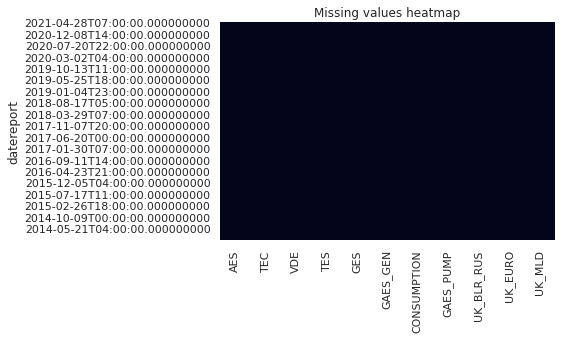

In [15]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [16]:
df.isnull().sum()

AES            0
TEC            0
VDE            0
TES            0
GES            0
GAES_GEN       0
CONSUMPTION    0
GAES_PUMP      0
UK_BLR_RUS     0
UK_EURO        0
UK_MLD         0
dtype: int64

### - Analysis values distribution for each column

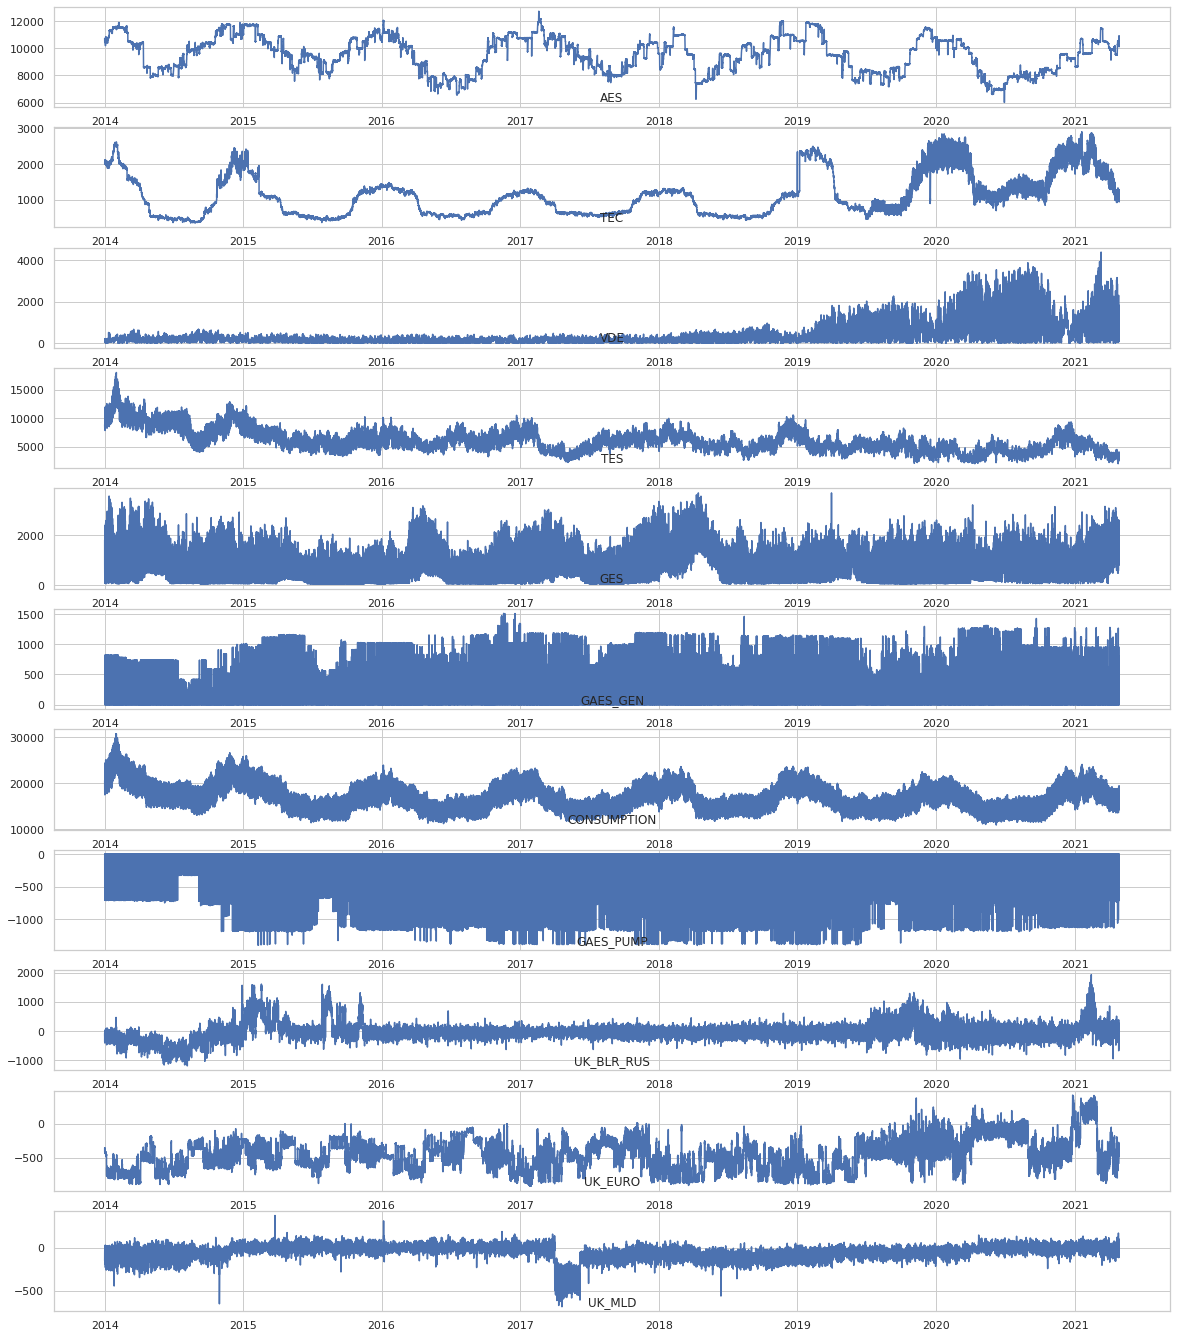

In [17]:
plt.figure(figsize= (20, 24))
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name= df.columns[i]
    plt.plot(df[name])
    plt.title(name, y=0)
plt.show()

In [18]:
# def plotNumeric(attribute, ax_index):
#     sns.distplot(df[[attribute]], ax=axes[ax_index][0])
#     axes[ax_index][0].set(xlabel=attribute, ylabel='density')
    
# def plotGrid():
#     [plotNumeric(x, i) for i, x in enumerate(numeric_columns)]
# fig_numeric, axes = plt.subplots(nrows=len(df.columns), ncols=2, figsize=(15, 42))
# plotGrid();

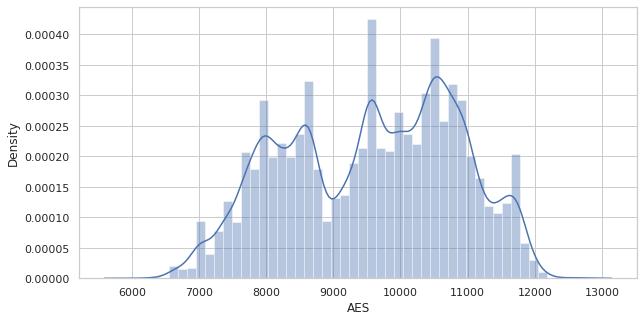

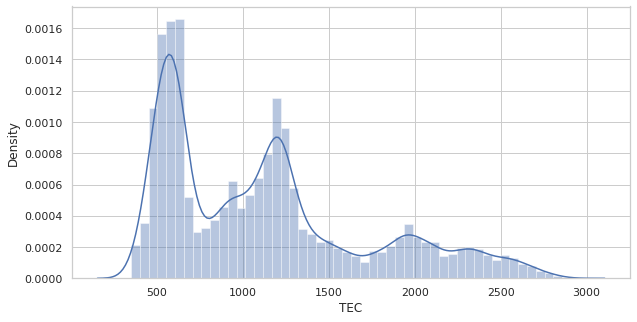

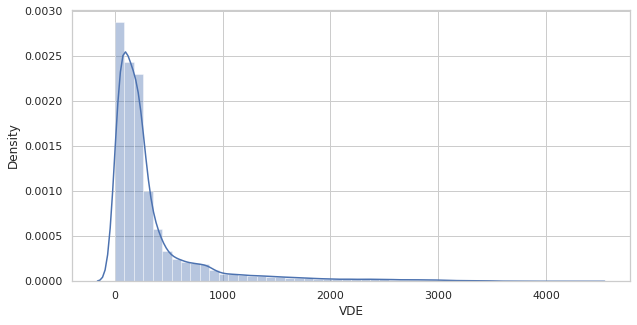

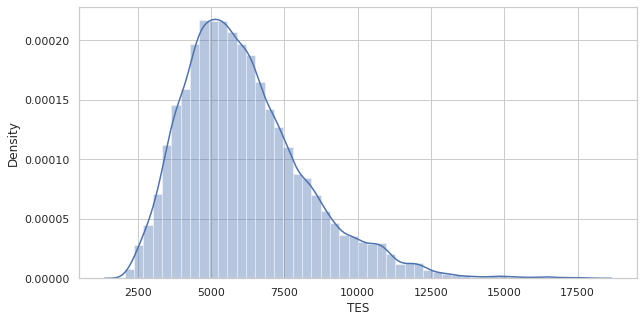

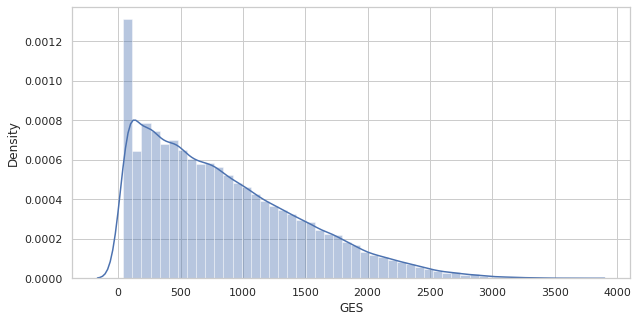

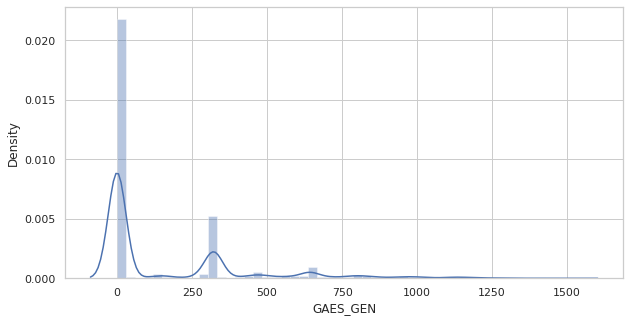

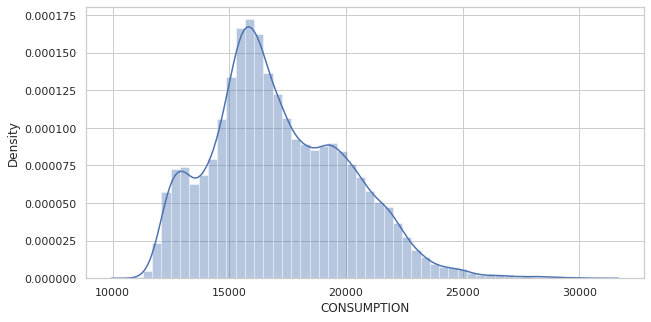

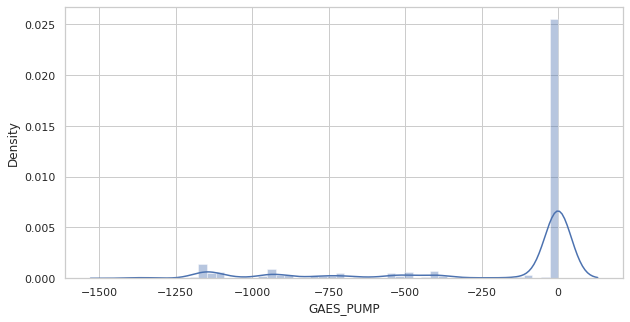

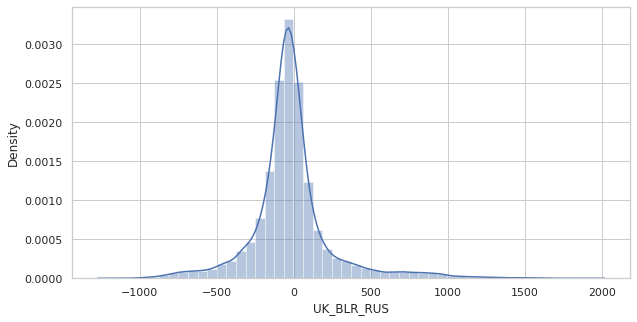

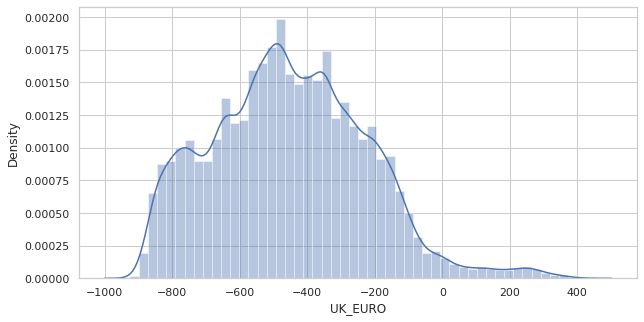

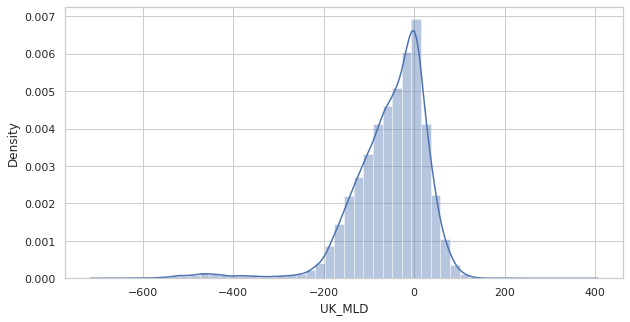

In [19]:
for col in df.columns[0:]:
    plt.figure(figsize=(10, 5))
    sns.distplot(df[col])

### - Change in daily ['AES', 'TEC', 'VDE', 'TES', 'GES', 'GAES_GEN', 'CONSUMPTION', 'GAES_PUMP', 'UK_BLR_RUS', 'UK_EURO', 'UK_MLD']
#### -- analyze the change in daily average. Is there any seasonal behaviour? did consumption change with years?

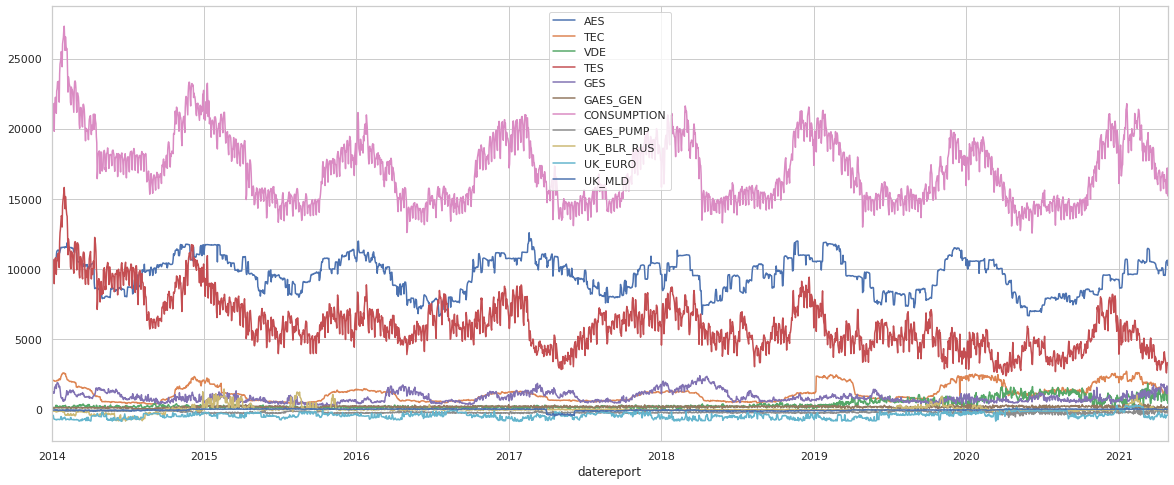

In [20]:
daily_group = df.resample('D')
daily_group.mean().plot(figsize=(20,8));

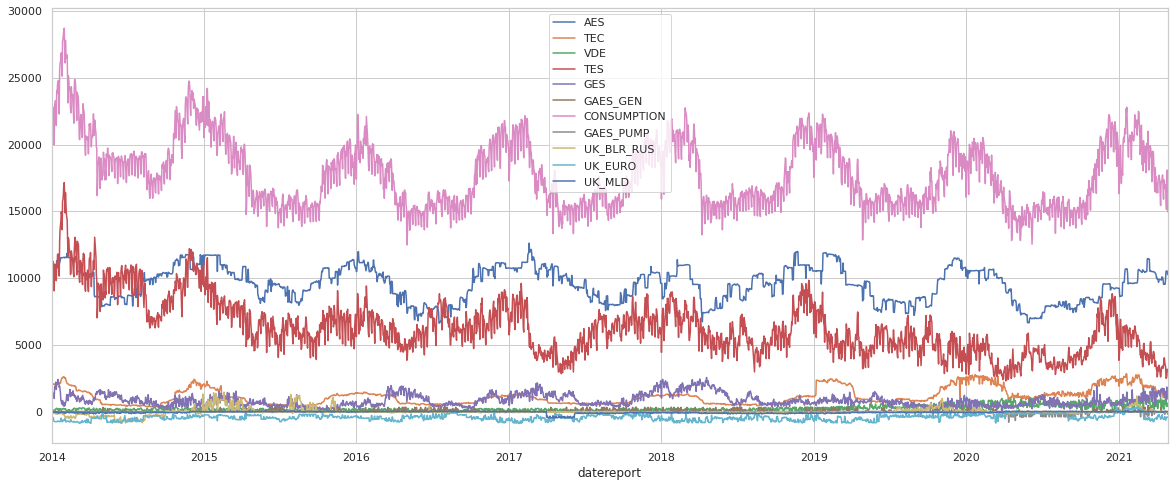

In [21]:
daily_group.median().plot(figsize=(20,8));

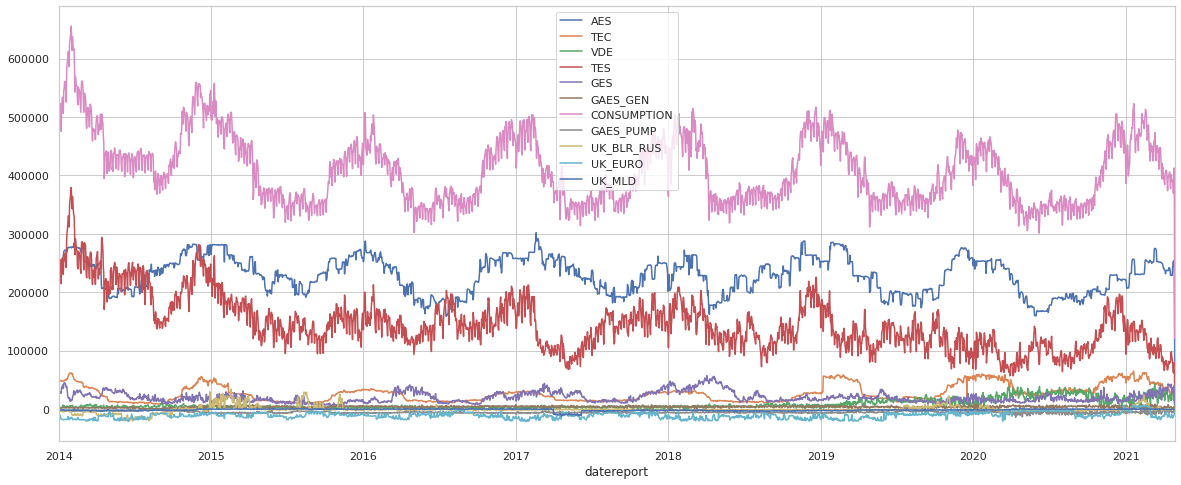

In [22]:
daily_data_sum = daily_group.sum()
daily_data_sum.plot(figsize=(20,8));

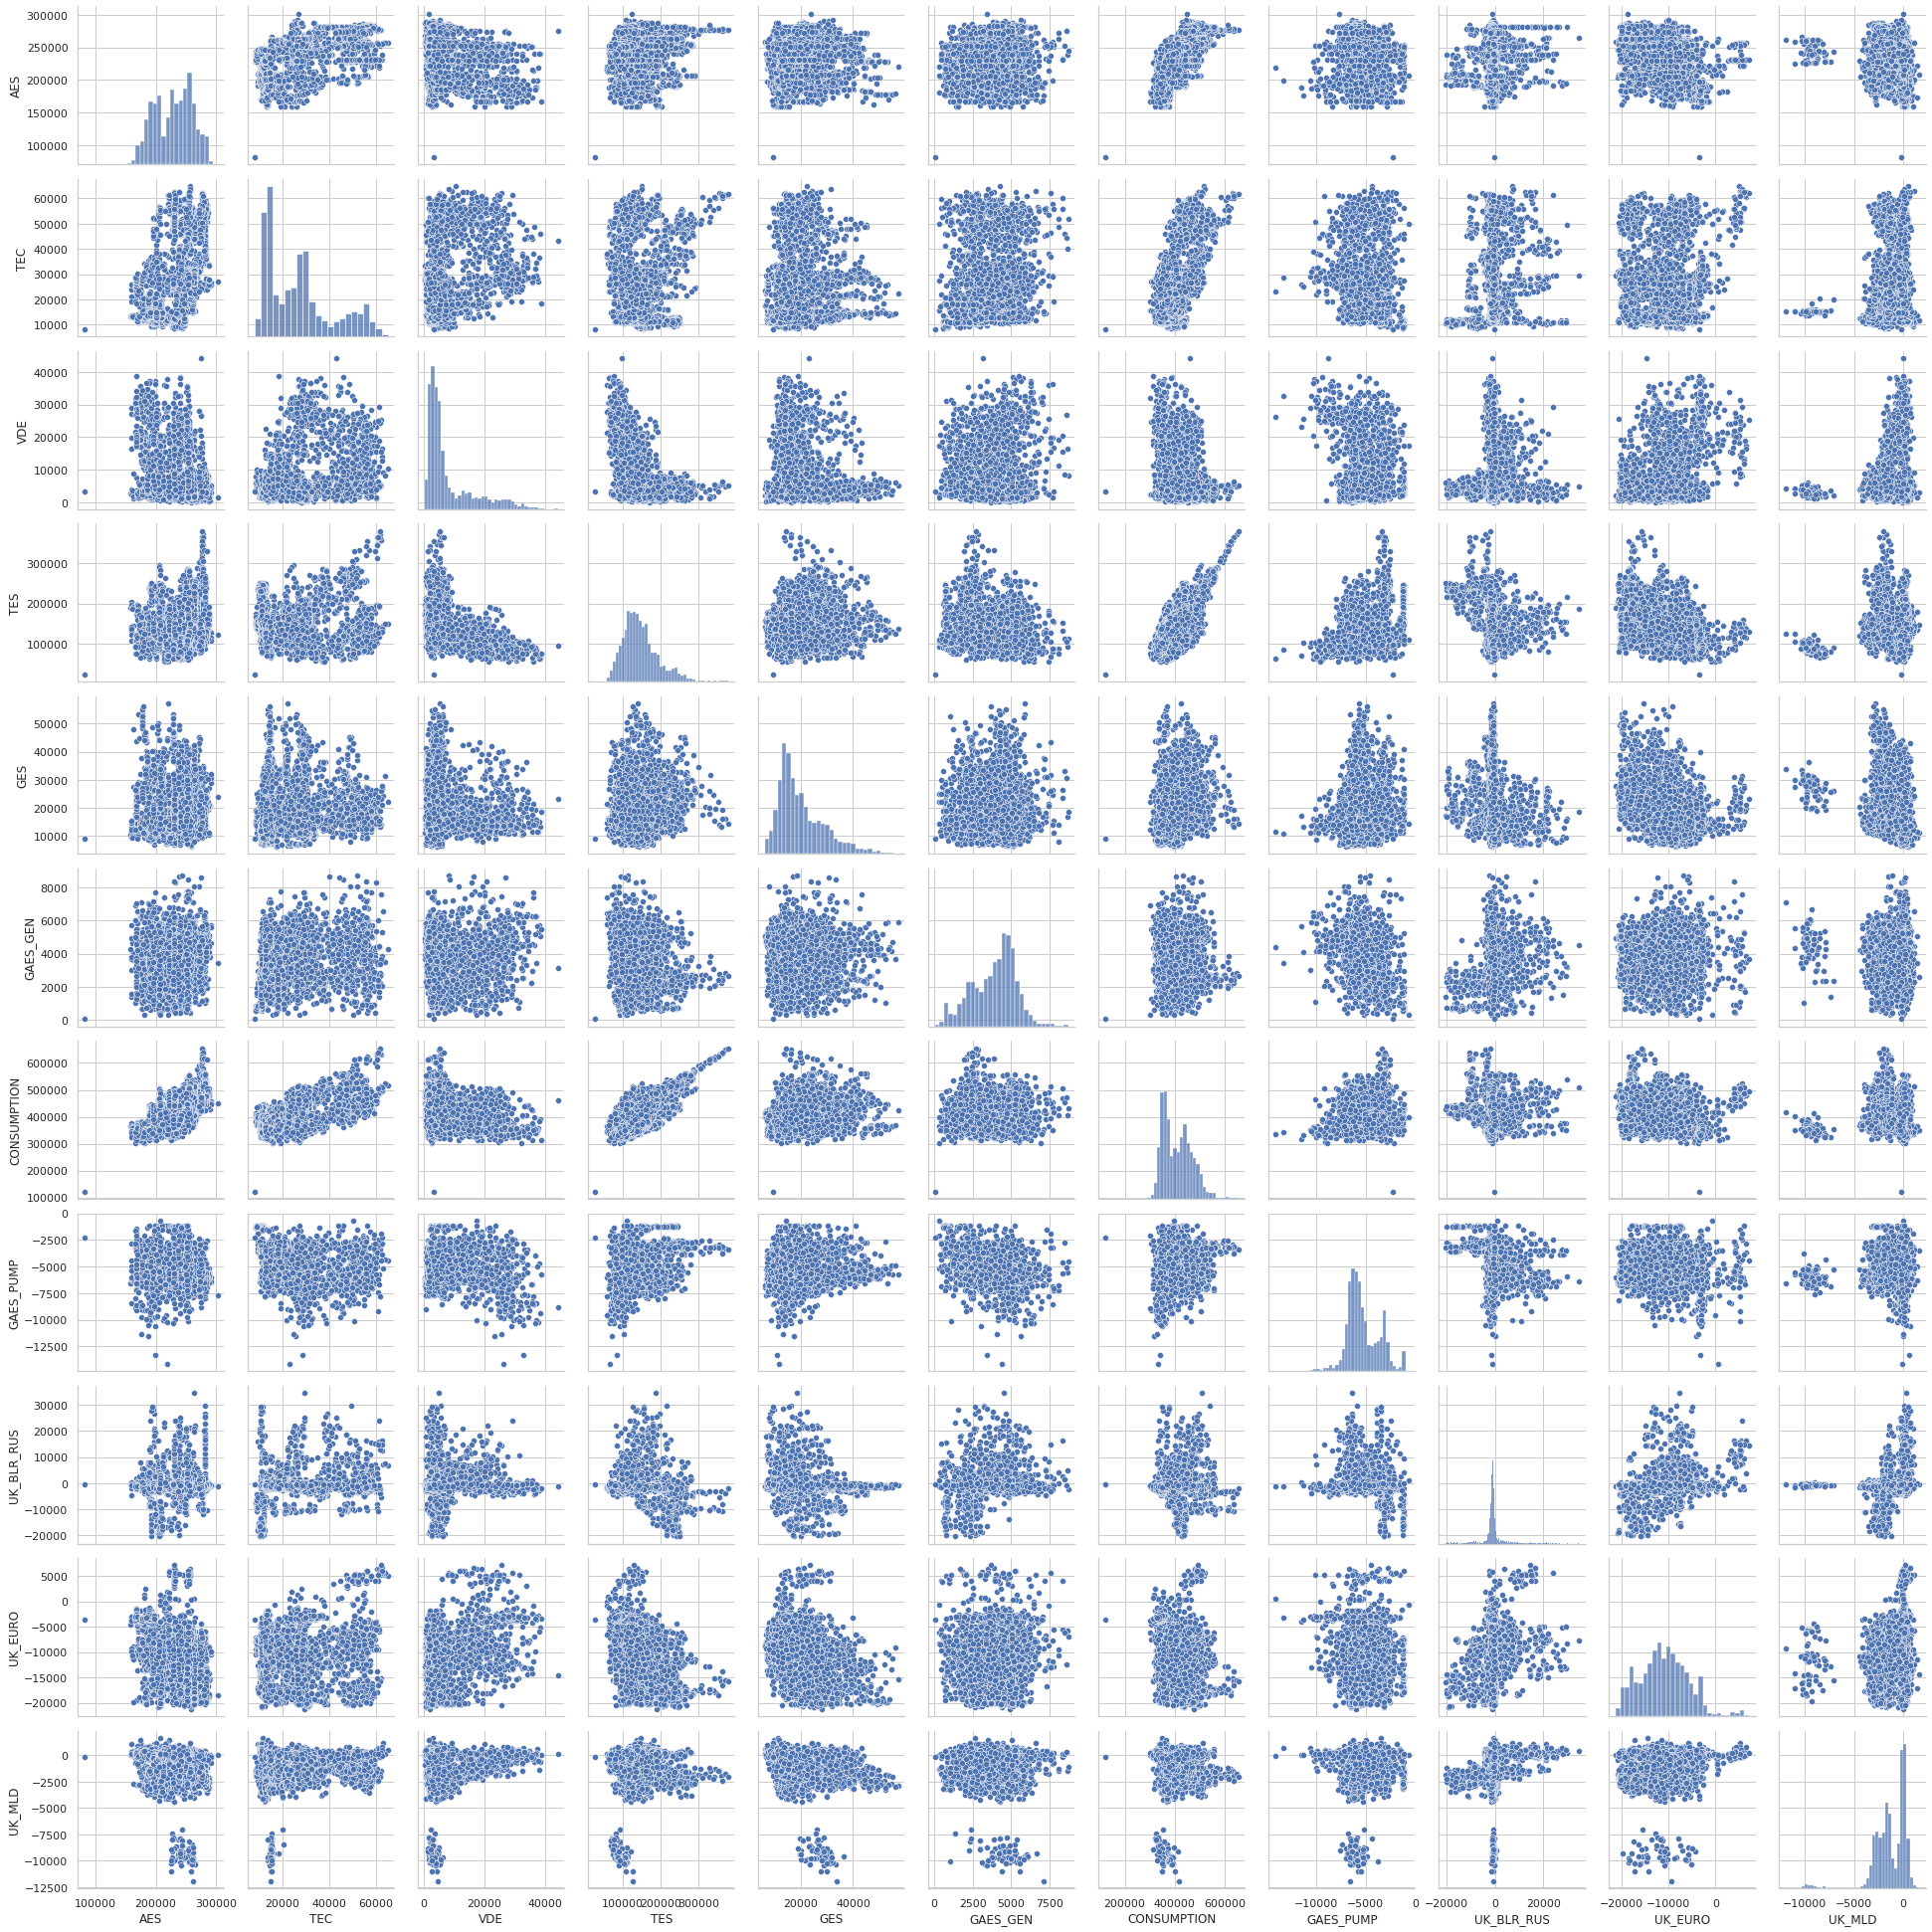

In [23]:
sns.pairplot(daily_data_sum, height = 2.5)

### - Detecting outliers

<AxesSubplot:>

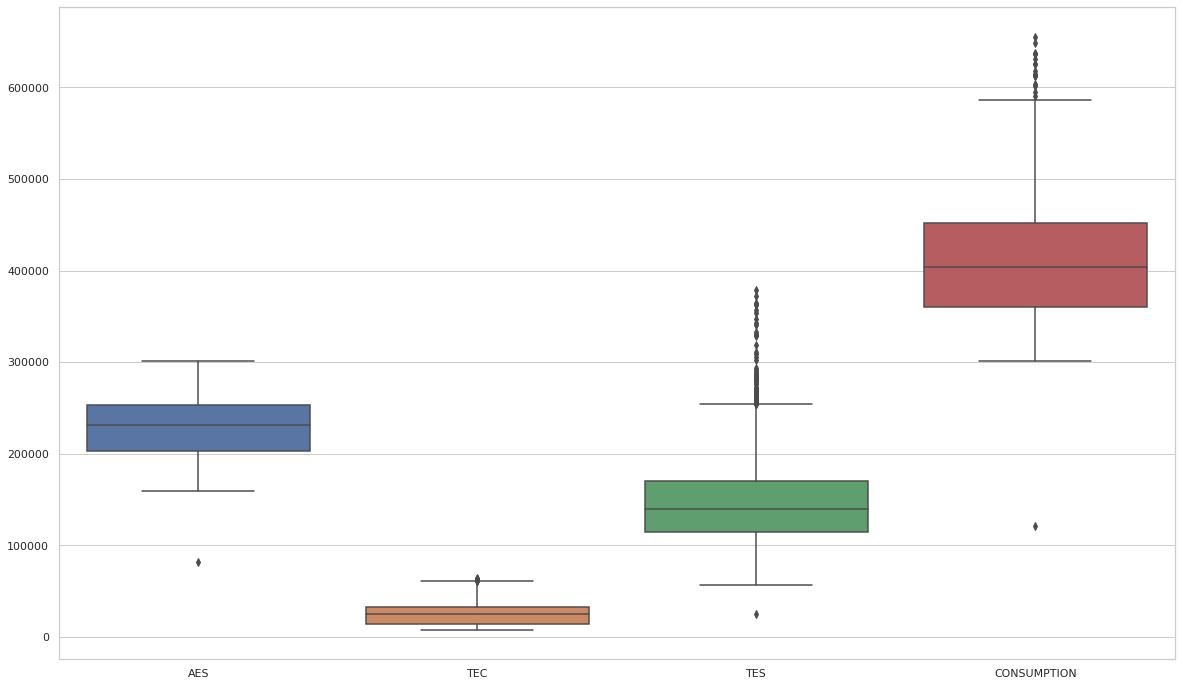

In [24]:
plt.subplots(figsize=(20,12))
sns.boxplot(data=daily_data_sum[['AES', 'TEC', 'TES', 'CONSUMPTION']])

### - Change in monthly ['AES', 'TEC', 'VDE', 'TES', 'GES', 'GAES_GEN', 'CONSUMPTION', 'GAES_PUMP', 'UK_BLR_RUS', 'UK_EURO', 'UK_MLD']

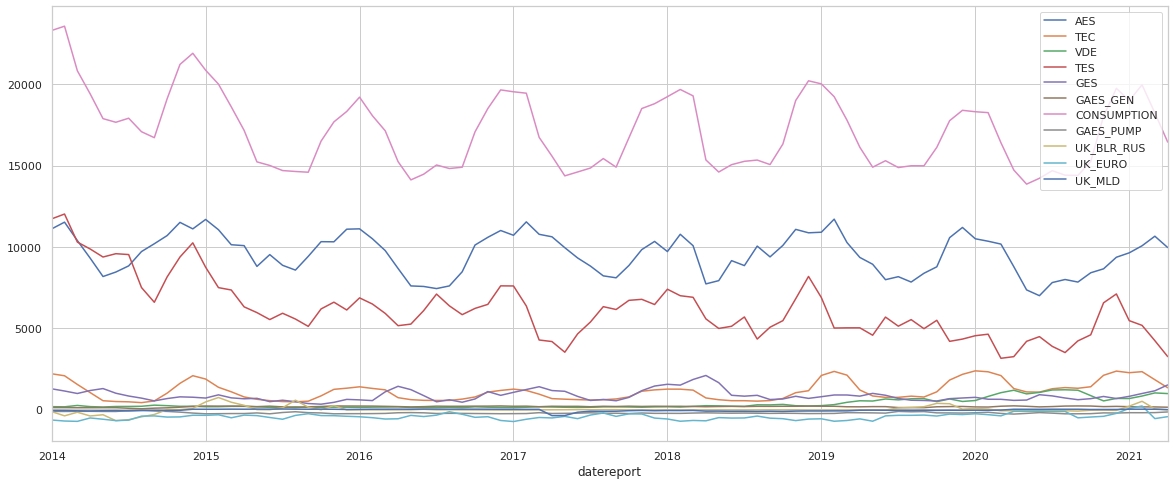

In [25]:
monthly_group = df.resample('M')
monthly_group.mean().plot(figsize=(20,8));

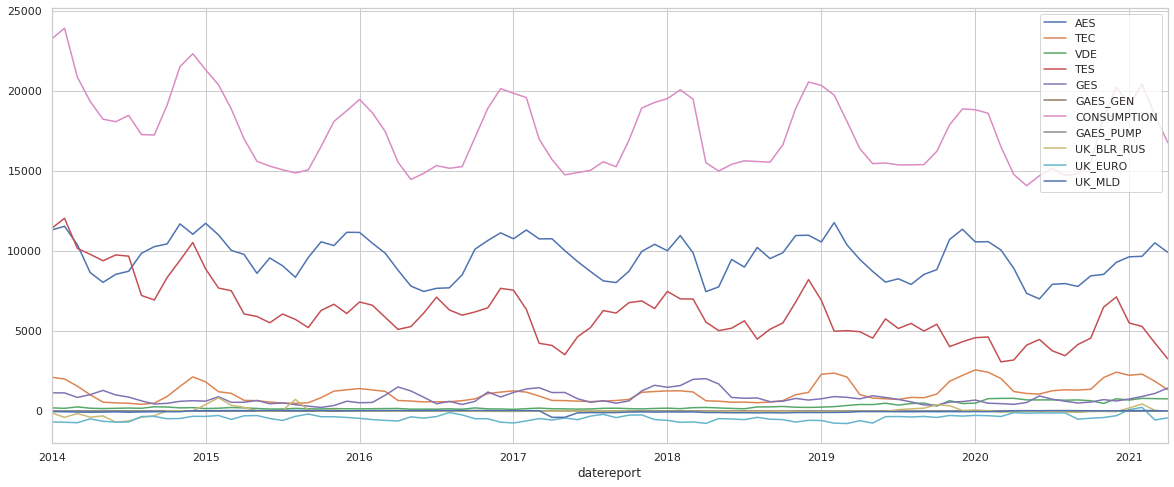

In [26]:
monthly_group.median().plot(figsize=(20,8));

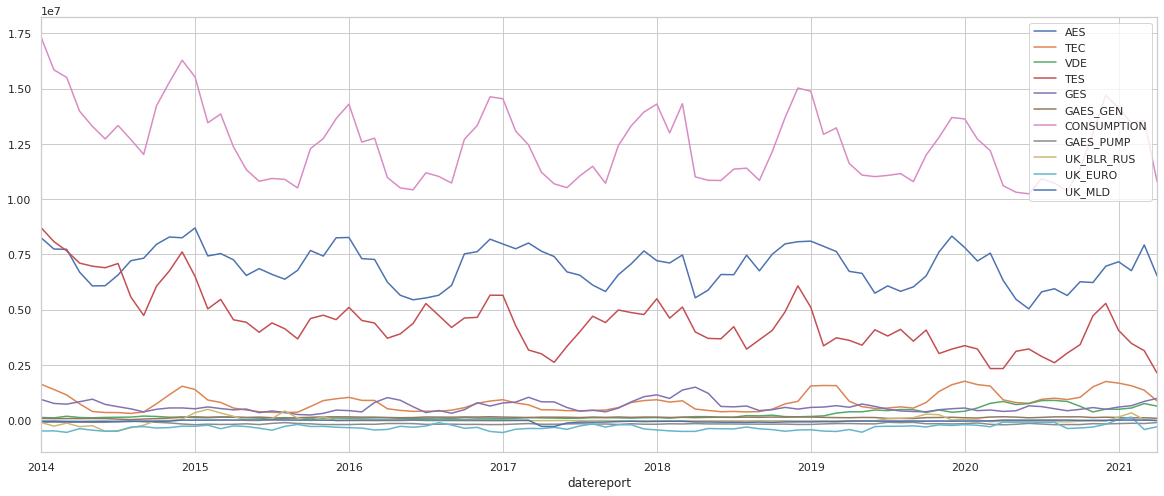

In [27]:
monthly_group.sum().plot(figsize=(20,8));

### - Change in yearly average ['AES', 'TEC', 'VDE', 'TES', 'GES', 'GAES_GEN', 'CONSUMPTION', 'GAES_PUMP', 'UK_BLR_RUS', 'UK_EURO', 'UK_MLD']

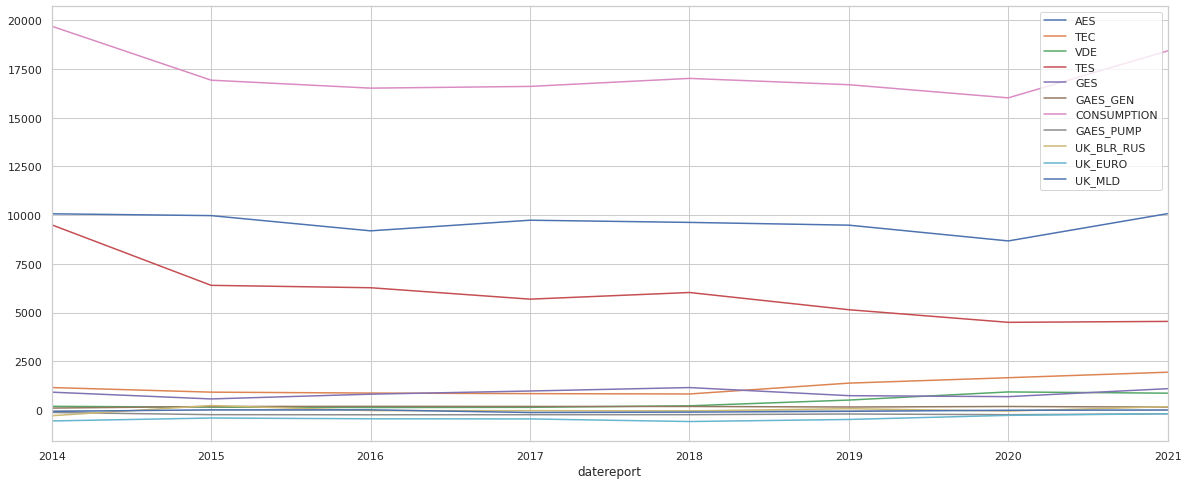

In [28]:
yearly_group = df.resample('Y')
yearly_group.mean().plot(figsize=(20,8));

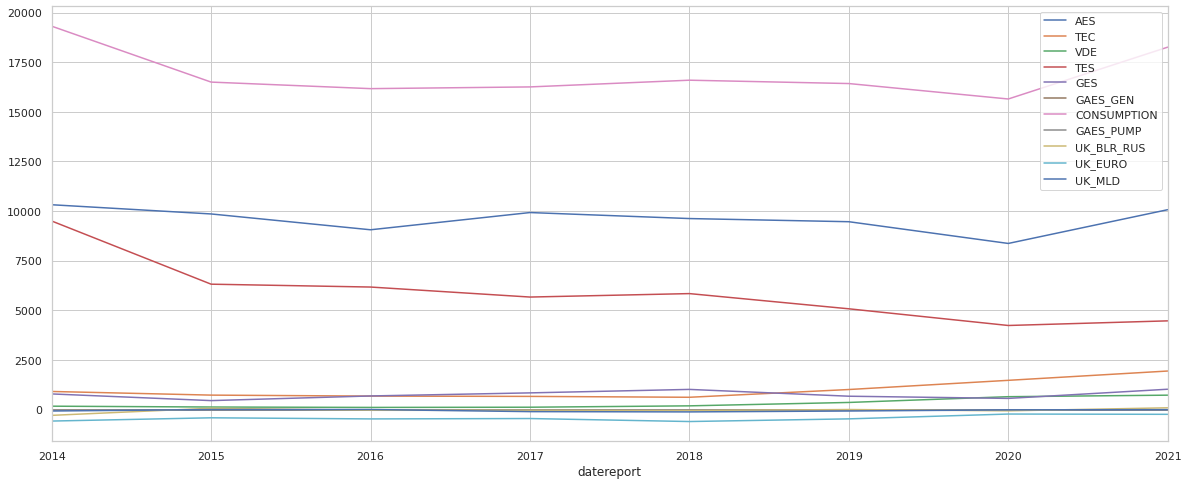

In [29]:
yearly_group.median().plot(figsize=(20,8));

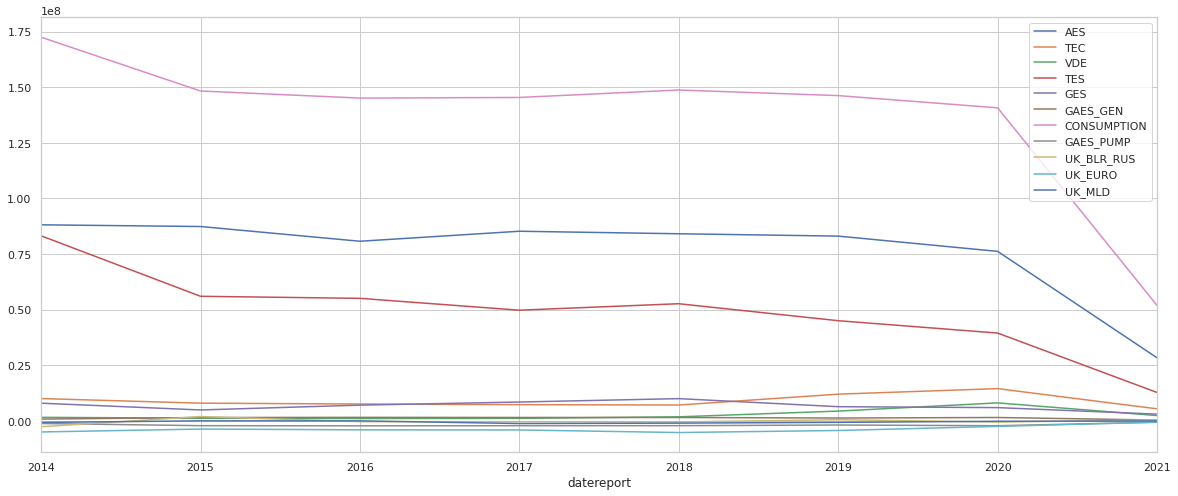

In [30]:
yearly_group.sum().plot(figsize=(20,8));

### - Ploting columns with respect to date(2020-01-01 and 2020-12-31)

#### -- min CONSUMPTION

In [31]:
mask = (df.index > '2020-01-01') & (df.index < '2021-01-01')
loc_min_con_group = df.loc[mask].resample('M')

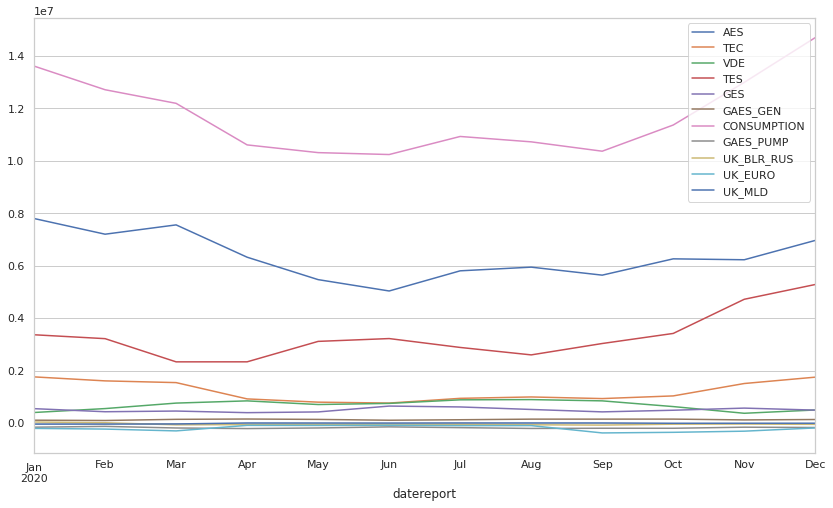

In [32]:
loc_min_con_group.sum().plot(figsize=(14,8));

#### -- max CONSUMPTION

In [33]:
mask = (df.index > '2014-01-01') & (df.index < '2015-01-01')
loc_max_con_group = df.loc[mask].resample('M')

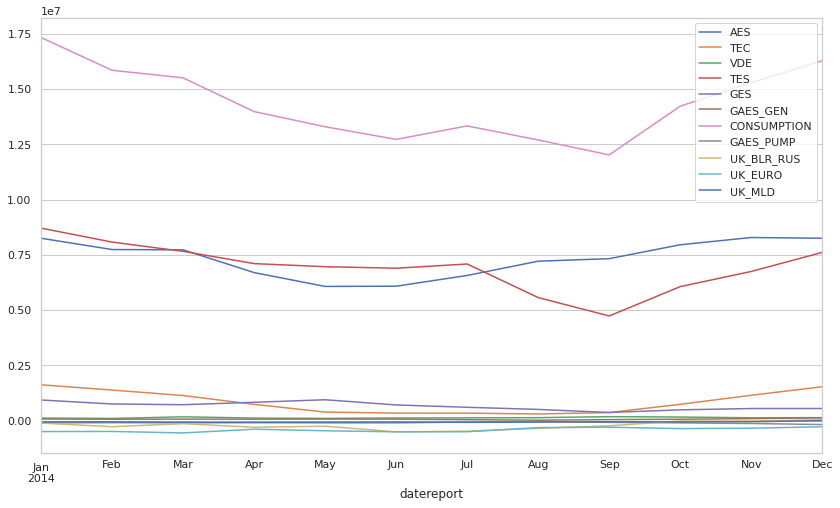

In [34]:
loc_max_con_group.sum().plot(figsize=(14,8));

### - Correlation between columns

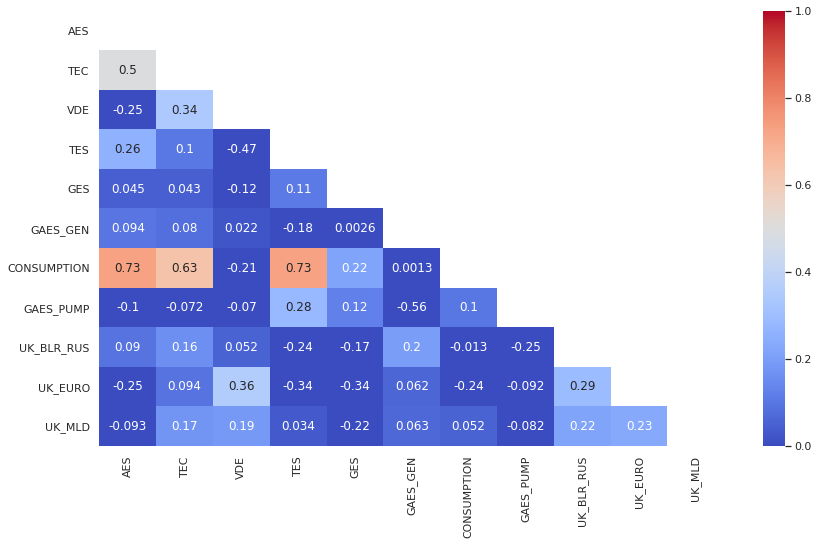

In [35]:
pearson = daily_group.sum().corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(14,8))
sns.heatmap(pearson, vmax=1, vmin=0, cbar=True, annot=True, cmap="coolwarm", mask=mask);

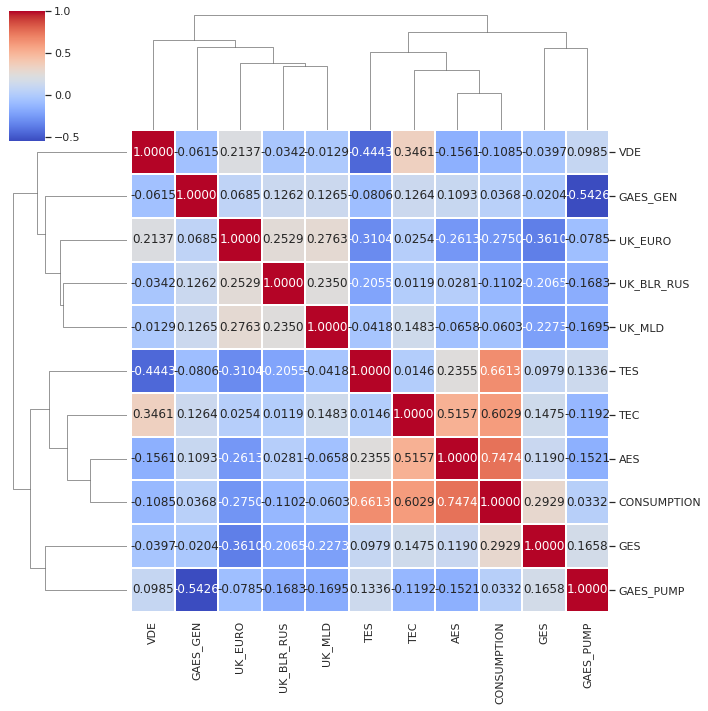

In [36]:
spearman = daily_group.sum().corr(method='spearman')
cg = sns.clustermap(spearman, cmap='coolwarm', linewidths=0.1, annot=True, fmt=".4f");
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

#### Summing up, for further work, including predicting the value of the target feature, first of all I would choose the following clusters ('AES', 'TEC', 'TES', 'CONSUMPTION'), ('AES', 'TEC' , 'TES', 'CONSUMPTION', 'GES', 'GAES_PUMP'), since they are quite correlated, I was also very interested in the correlation ('GES', 'GAES_PUMP'), ('UK_BLR_RUS', 'UK_EURO', 'UK_MLD'), ('TEC', 'VDE'). During the modeling part, I would use step-by-step validation for the entire dataset as it is very useful for large time series data.

### - Just for fun, lets test the data :)

In [74]:
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [75]:
# ['AES', 'TEC', 'VDE', 'TES', 'GES', 'GAES_GEN', 'CONSUMPTION', 'GAES_PUMP', 'UK_BLR_RUS', 'UK_EURO', 'UK_MLD']
# 
# df_xy = df
# df_xy = daily_data_sum
df_xy = df[['AES', 'TEC', 'TES', 'CONSUMPTION']]
# df_xy = df[['AES', 'TEC' , 'TES', 'CONSUMPTION', 'GES', 'GAES_PUMP']]
df_xy.head()

AES     TEC     TES  CONSUMPTION
datereport                                               
2021-04-28 07:00:00  10303.0  1126.0  3379.0      16820.0
2021-04-28 06:00:00  10304.0   963.0  3068.0      15271.0
2021-04-28 05:00:00  10263.0   938.0  3029.0      14498.0
2021-04-28 04:00:00  10229.0   944.0  3037.0      14514.0
2021-04-28 03:00:00  10113.0   939.0  3045.0      14468.0

In [76]:
def get_xy(_df, target="CONSUMPTION"):
    return _df.drop(target, axis=1), _df[target]

In [77]:
def rmse(Y_true, Y_test):
    return np.mean(np.sqrt(np.power(Y_true-Y_test,2)))

In [78]:
X, y = get_xy(df_xy)

In [79]:
X.head()

AES     TEC     TES
datereport                                  
2021-04-28 07:00:00  10303.0  1126.0  3379.0
2021-04-28 06:00:00  10304.0   963.0  3068.0
2021-04-28 05:00:00  10263.0   938.0  3029.0
2021-04-28 04:00:00  10229.0   944.0  3037.0
2021-04-28 03:00:00  10113.0   939.0  3045.0

In [80]:
y.head()

datereport
2021-04-28 07:00:00    16820.0
2021-04-28 06:00:00    15271.0
2021-04-28 05:00:00    14498.0
2021-04-28 04:00:00    14514.0
2021-04-28 03:00:00    14468.0
Name: CONSUMPTION, dtype: float64

In [81]:
X_train, X_test , y_train , y_test = train_test_split(X, y, shuffle=False)

In [82]:
scaler.fit(X_train) 
X_train_normed = pd.DataFrame(scaler.transform(X_train))
X_test_normed = pd.DataFrame(scaler.transform(X_test))
X_train_normed.head()

0     1     2
0  0.67 -0.07 -1.40
1  0.67 -0.34 -1.61
2  0.64 -0.39 -1.63
3  0.61 -0.38 -1.63
4  0.53 -0.38 -1.62

In [83]:
rf = RandomForestRegressor(n_estimators=200,max_depth=30,max_features=.8)

In [87]:
# rf.fit(X_train_normed, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features=0.8, n_estimators=200)

In [85]:
rf.predict(X_test)
# rf.predict(X_test_normed)

array([18324.275, 18705.925, 17426.135, ..., 21734.745, 21926.68 ,
       21876.45 ])

In [86]:
rmse(rf.predict(X_train),y_test.values.flatten())
# rmse(rf.predict(X_train_normed),y_test.values.flatten())

ValueError: operands could not be broadcast together with shapes (48112,) (16038,) 

0         1         2
count  5.77e+04  5.77e+04  5.77e+04
mean  -3.72e-17  1.91e-17  1.37e-17
std    1.00e+00  1.00e+00  1.00e+00
min   -2.77e+00 -1.30e+00 -1.93e+00
25%   -8.36e-01 -8.71e-01 -7.14e-01
50%    6.29e-02 -1.54e-01 -1.64e-01
75%    8.02e-01  4.39e-01  5.33e-01
max    2.46e+00  2.99e+00  5.60e+00

In [63]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
y_predict_test = lr.predict(X_test)
logger.info(f'ScoreTest R^2: {lr.score(X_test, y_predict_test)}')
logger.info(f'R^2: {lr.score(X_train, y_train)}')

ScoreTest R^2: 1.0
R^2: 0.8186629118219276


In [64]:
mse = np.average((y_predict-y_test)**2)
logger.info(f'mse: {mse}')
rmse = np.sqrt(mse)
logger.info(f'rmse: {rmse}')

mse: 1541777.132968556
rmse: 1241.683185425556
